In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [241]:
train = pd.read_csv(r'C:\Users\prasad\Downloads\Dataset files\MutualFund\train.csv')
test = pd.read_csv(r'C:\Users\prasad\Downloads\Dataset files\MutualFund\test.csv')

In [242]:
train.head()

,Id,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3768,8372,211000,1.90,3,0.95,99.05,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,6244,5022,98930000,1.57,2,0.00,0.00,100.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65
2,2230,3668,440000000,0.53,4,1.71,0.00,98.29,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.20
3,7518,8745,56050000,0.93,3,2.64,31.29,57.06,0.80,7.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.64
4,8037,17449,173040000,2.26,2,5.24,94.75,0.00,0.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00


In [243]:
train.dtypes.value_counts()

float64    148
int64        6
dtype: int64

In [244]:
train.isnull().sum()

Id                           0
Serial Number                0
total_net_assets             0
net_annual_expenses_ratio    0
morningstar_rating           0
                            ..
category_107                 0
investment_0                 0
investment_1                 0
investment_2                 0
bonds_aaa                    0
Length: 154, dtype: int64

In [245]:
counts = {}
for col in train.columns.tolist():
    counts[col] = train[col].nunique()

In [246]:
cat = []
num =[]
for key, val in counts.items():
    if val<50:
        cat.append(key)
    else:
        num.append(key)
print(f'The number of categorical features are {len(cat)}')
print(f'The number of numerical features are {len(num)}')

The number of categorical features are 115
The number of numerical features are 39


Id


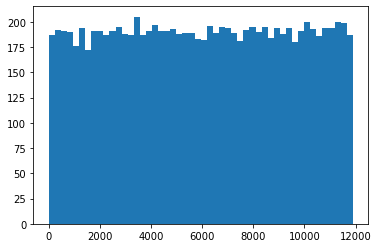

Serial Number


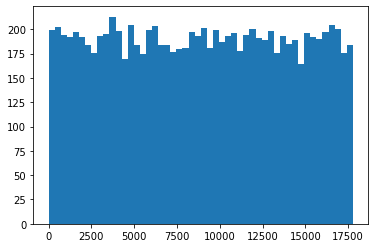

total_net_assets


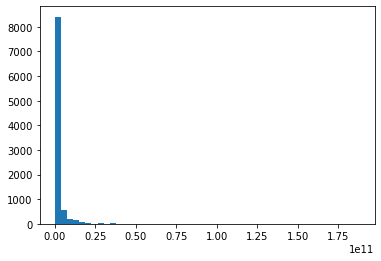

net_annual_expenses_ratio


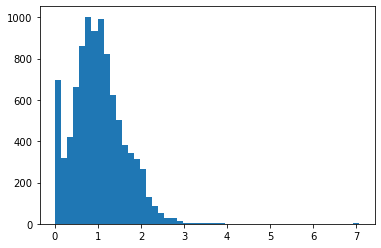

portfolio_cash


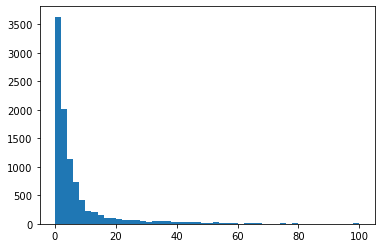

portfolio_stocks


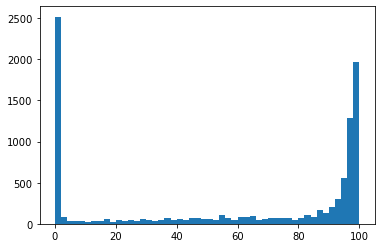

portfolio_bonds


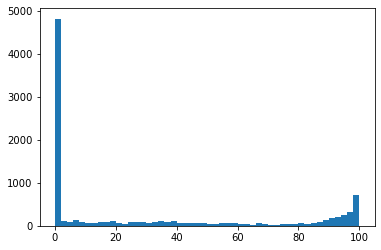

portfolio_others


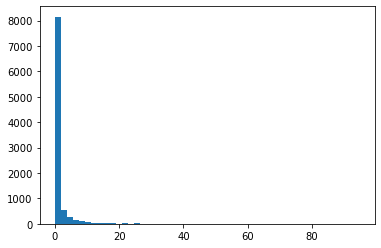

portfolio_preferred


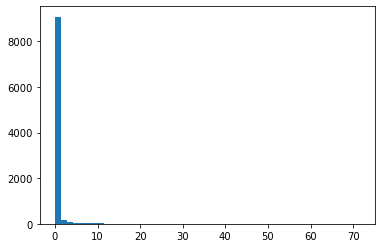

portfolio_convertable


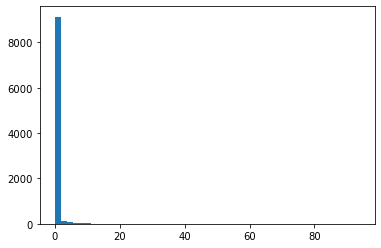

sectors_basic_materials


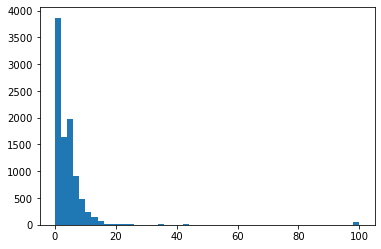

sectors_consumer_cyclical


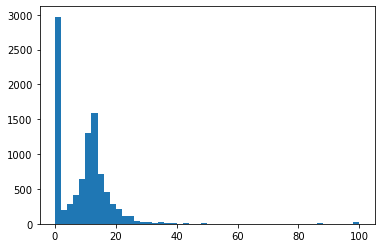

sectors_financial_services


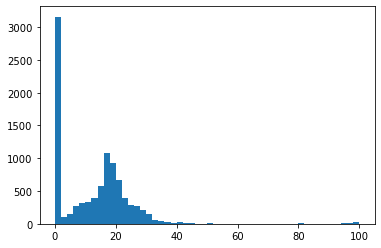

sectors_real_estate


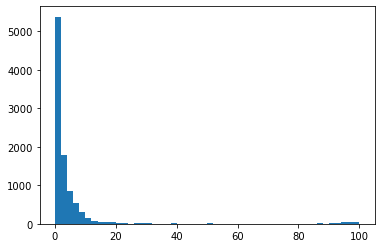

sectors_consumer_defensive


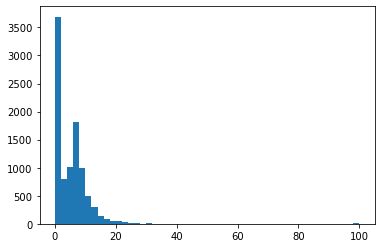

sectors_healthcare


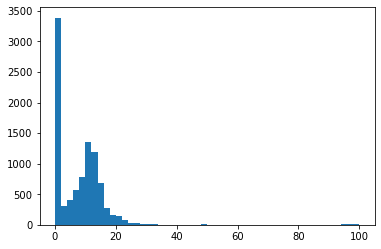

sectors_utilities


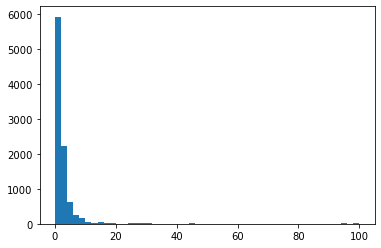

sectors_communication_services


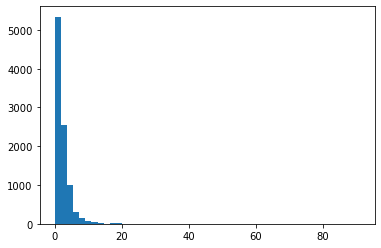

sectors_energy


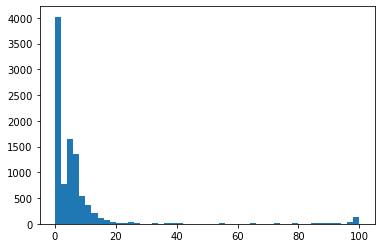

sectors_industrials


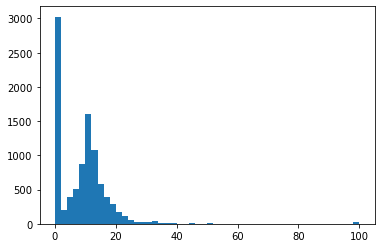

sectors_technology


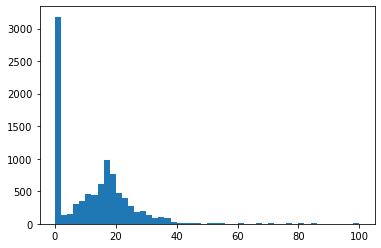

price_earning


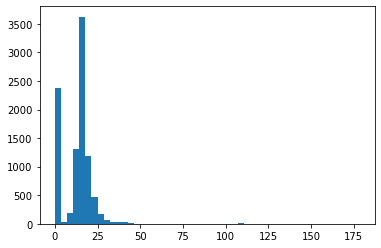

returns_ytd


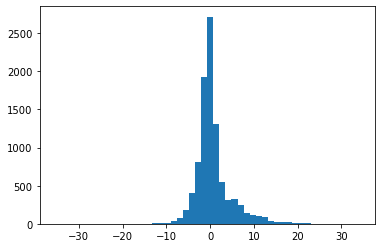

returns_2017


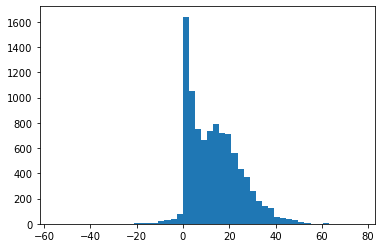

returns_2016


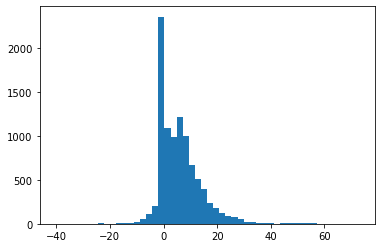

returns_2015


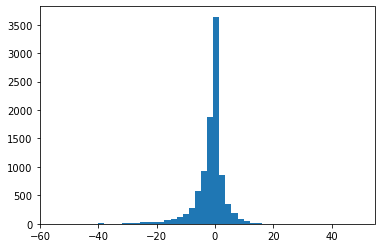

returns_2014


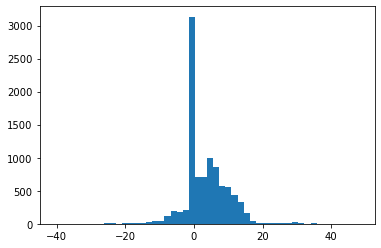

returns_2013


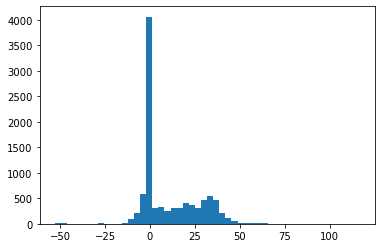

returns_2012


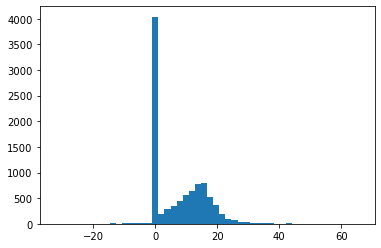

returns_2011


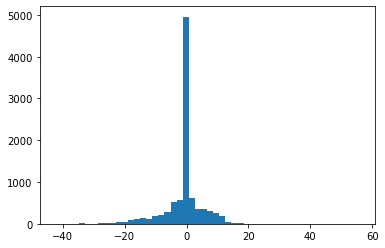

returns_2010


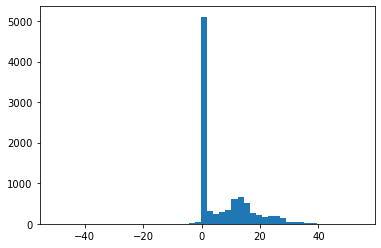

alpha_3y


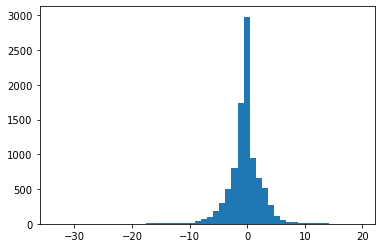

beta_3y


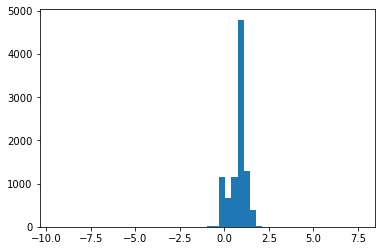

mean_annual_return_3y


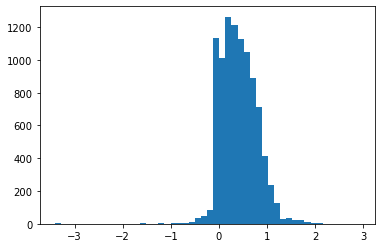

standard_deviation_3y


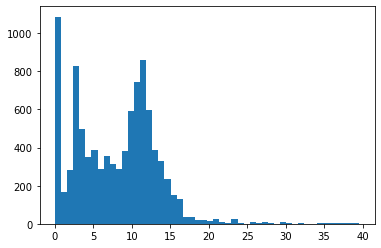

sharpe_ratio_3y


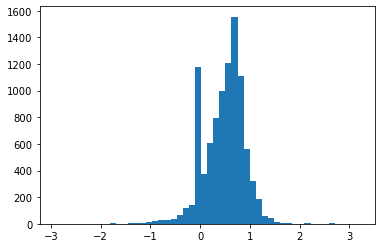

treynor_ratio_3y


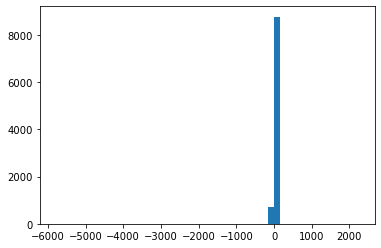

age_of_fund_yrs


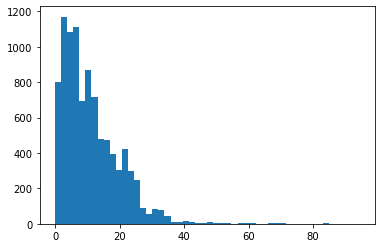

bonds_aaa


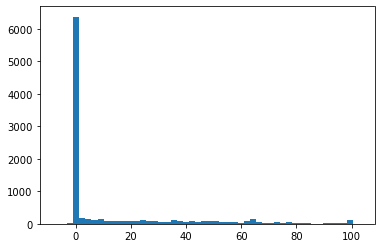

In [247]:
for i, col in enumerate(num):
    plt.hist(train[col], bins = 50)
    print(col)
    plt.show()
    

In [248]:
percentage = {}
for col in cat:
    if train[col].nunique()==2:
        percentage[col]=((train[col] ==0).sum()/len(train))*100
        

In [249]:
percentage = pd.Series(percentage)

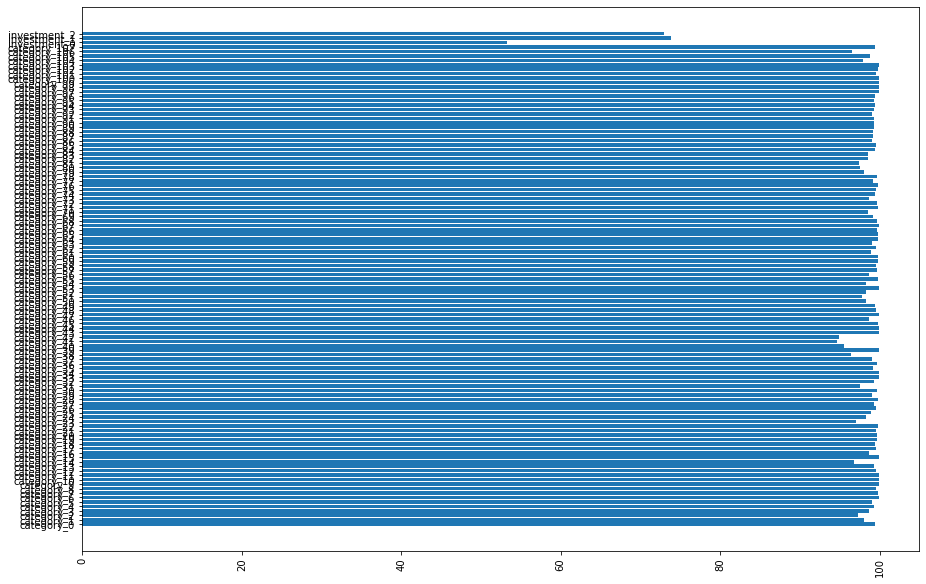

In [250]:
plt.figure(figsize = (15,10))
plt.barh(width=  percentage, y= percentage.index )
plt.xticks(rotation = 90)
plt.show()

In [251]:
categorylist = [x for x in train.columns.tolist() if 'category' in x]
portfoliolist = [x for x in train.columns.tolist() if 'portfolio' in x]
sectorslist = [x for x in train.columns.tolist() if 'sectors' in x ]
returnslist = [x for x in train.columns.tolist() if 'returns' in x ]
investmentlist  = [x for x in train.columns.tolist() if 'investment' in x ]
bondslist= [x for x in train.columns.tolist() if 'bonds' in x ]
morningstarlist = [x for x in train.columns.tolist() if 'morningstar' in x ]
y3list = [x for x in train.columns.tolist() if '3y' in x ]
listtypes = [categorylist, portfoliolist, sectorslist, returnslist, investmentlist, bondslist, morningstarlist, y3list]

In [252]:
notcategorylist = [x for x in train.columns.tolist() if x not in categorylist and x not in portfoliolist and x not in sectorslist and x not in returnslist and x not in investmentlist and x not in bondslist and x not in morningstarlist and x not in y3list]

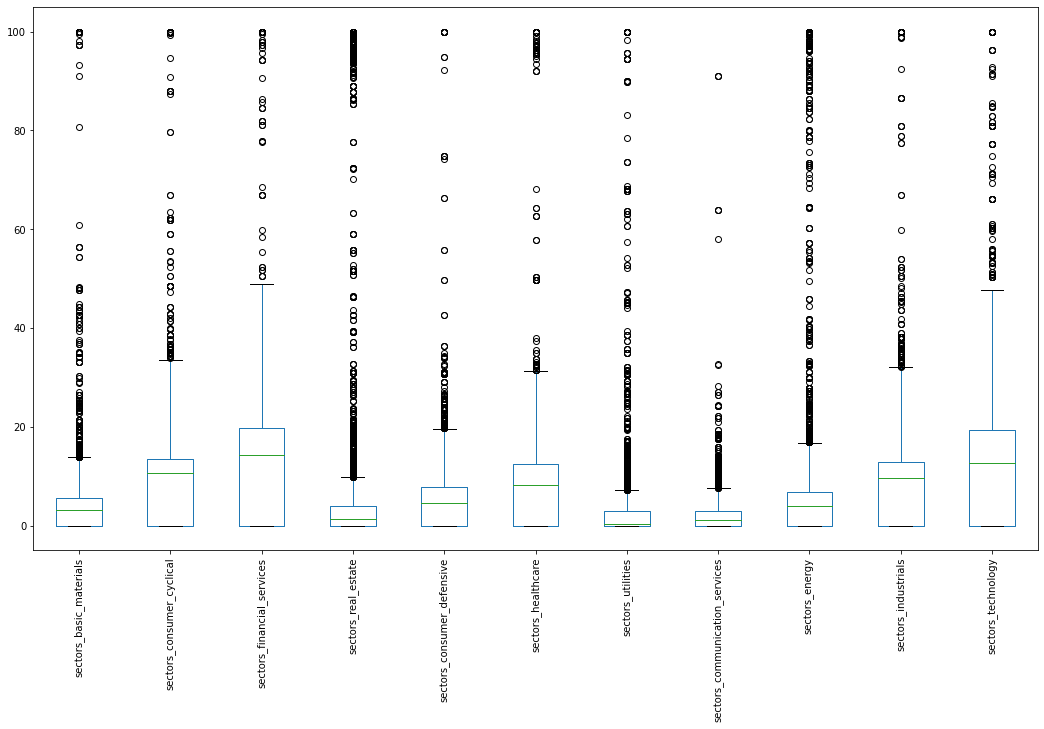

In [253]:
train[sectorslist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

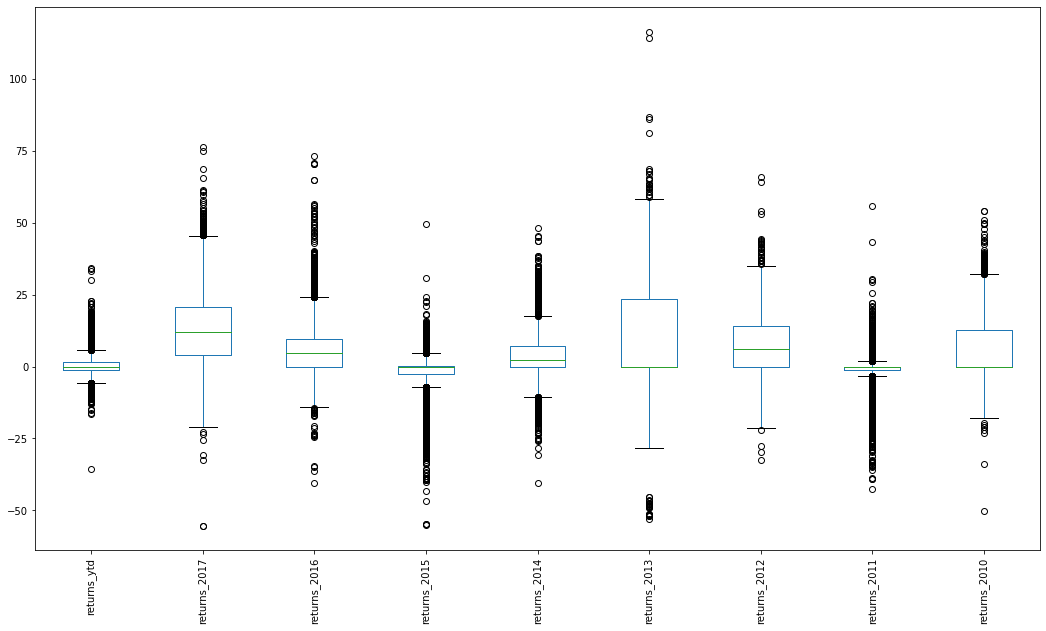

In [254]:
train[returnslist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

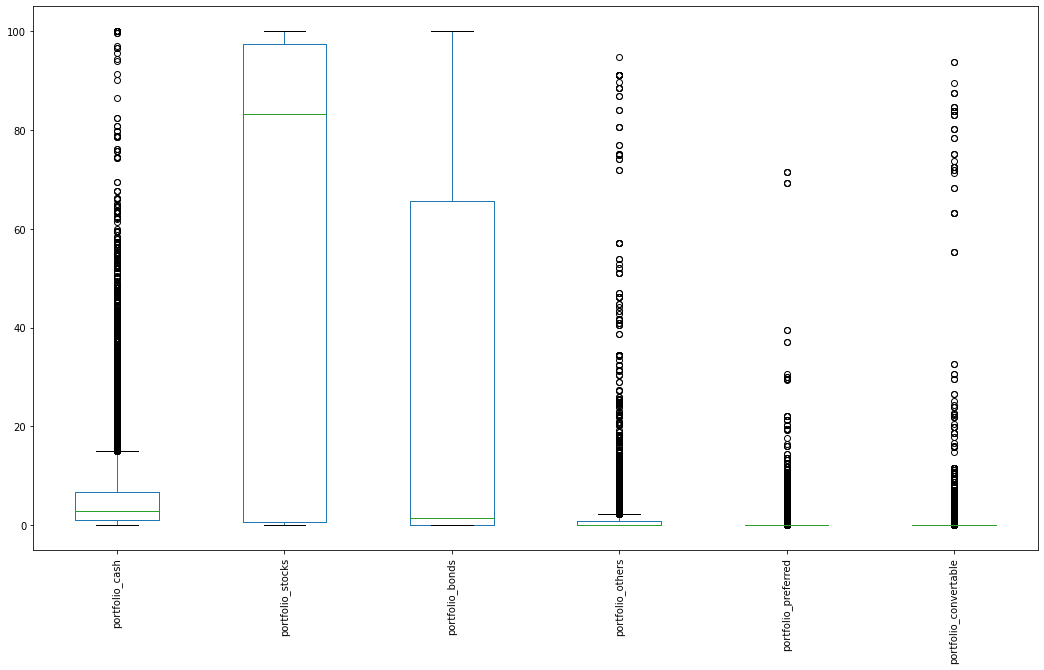

In [255]:
train[portfoliolist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

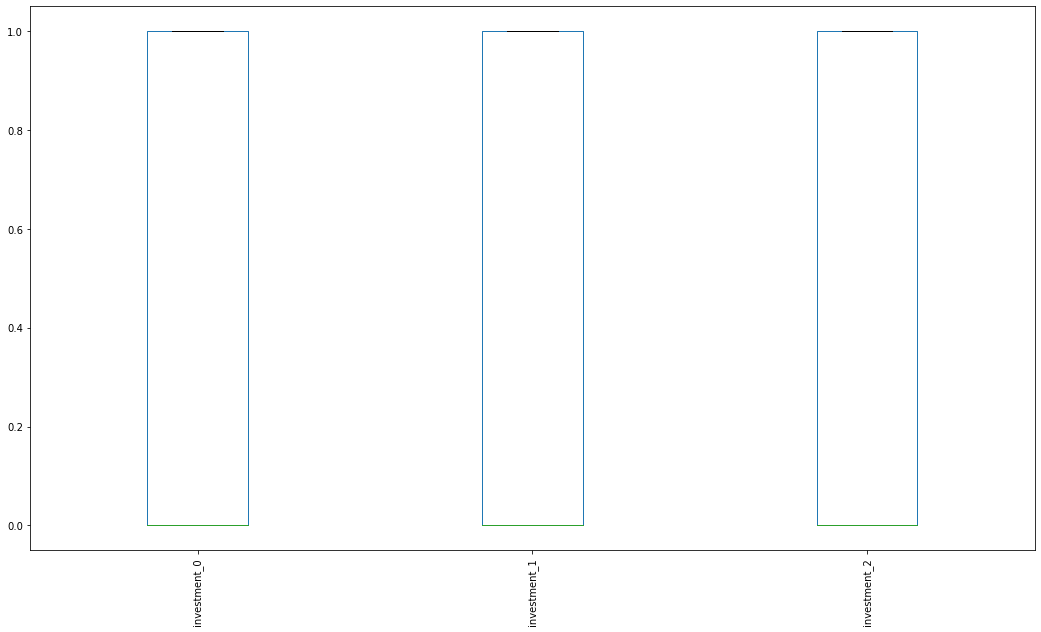

In [256]:
train[investmentlist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

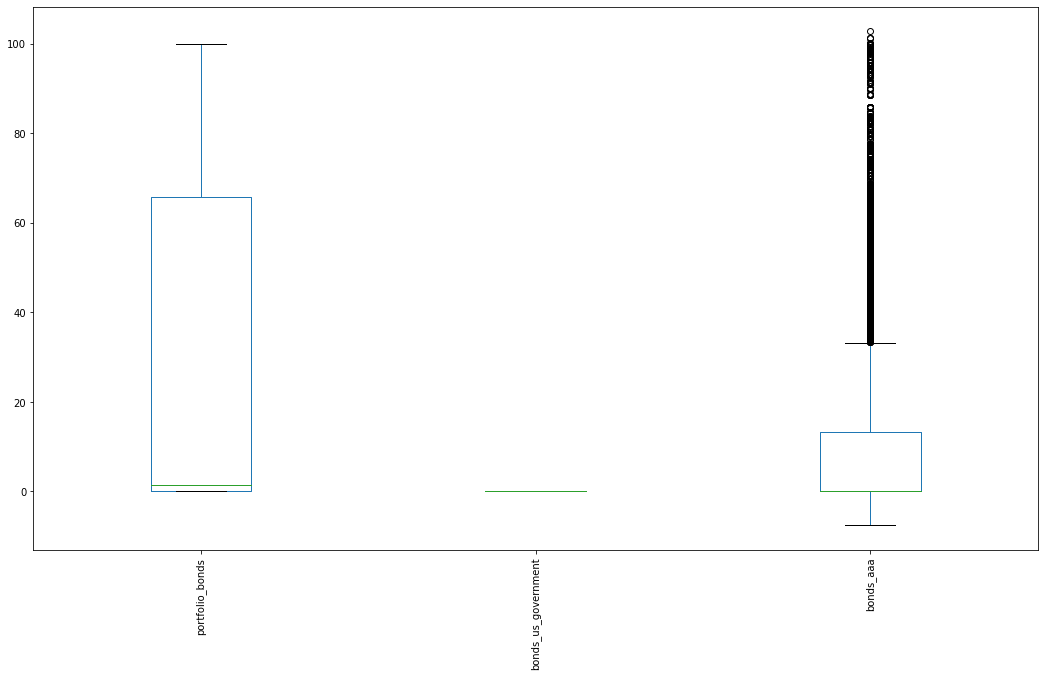

In [257]:
train[bondslist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

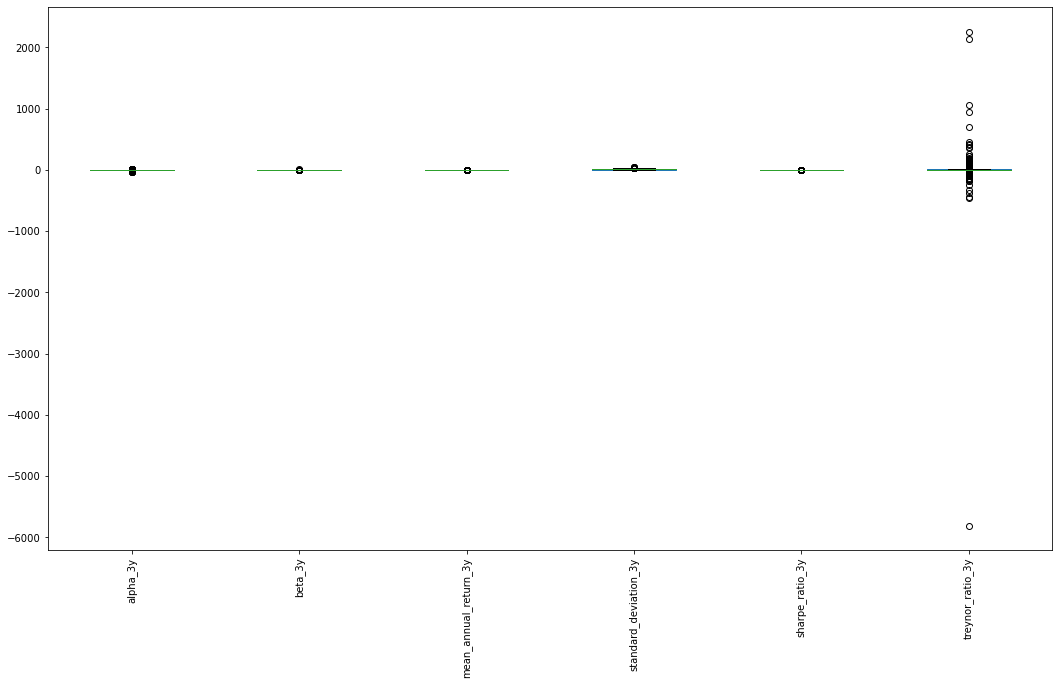

In [258]:
train[y3list].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

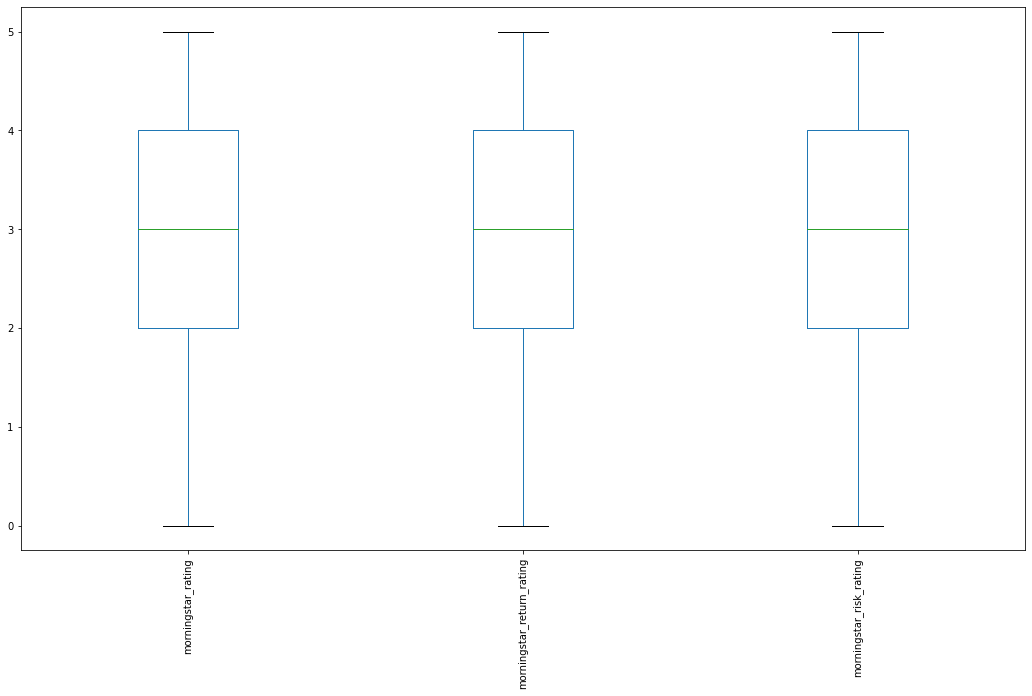

In [259]:
train[morningstarlist].plot(kind = 'box', figsize = (18,10))
plt.xticks(rotation = 90)
plt.show()

In [260]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error

In [286]:
X = train.drop(['Id', "Serial Number", 'bonds_aaa'], axis = 1)
y = train['bonds_aaa']

In [263]:
lin = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

In [147]:
cross_val_score(lin, X, y, cv  =6, scoring  = 'neg_root_mean_squared_error')

array([-15.21389571, -16.94696764, -14.986042  , -15.8678827 ,
       -15.89929275, -15.86772075])

In [148]:
cross_val_score(tree, X, y, cv  =6, scoring  = 'neg_root_mean_squared_error')

array([-12.8186507 , -12.96120915, -10.96801023, -13.53683635,
       -12.36246374, -12.84585496])

In [150]:
cross_val_score(forest, X, y, cv  =6, scoring  = 'neg_root_mean_squared_error')

array([-8.84274037, -9.39416107, -8.34968485, -9.52077985, -9.32410686,
       -9.7582477 ])

In [285]:
X_test = test.drop(['Id', 'Serial Number'], axis = 1)
tree.fit(X, y)
y_pred = tree.predict(X_test)

In [158]:
df = pd.DataFrame({'bonds_aaa':y_pred}, index = test.Id)
df.to_csv('Final.csv')

In [159]:
X_test = test.drop(['Id', 'Serial Number'], axis = 1)
forest.fit(X, y)
y_pred = forest.predict(X_test)
df = pd.DataFrame({'bonds_aaa':y_pred}, index = test.Id)
df.to_csv('Final2.csv')

In [283]:
params = {'max_depth':np.arange(1,15), 'min_samples_leaf': np.arange(1,15)}
search = GridSearchCV(tree, params, scoring = 'neg_root_mean_squared_error')
search.fit(X, y)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_root_mean_squared_error')

In [289]:
tree = DecisionTreeRegressor(min_samples_leaf = 6)
tree.fit(X, y)
tree.predict(X_test)
df = pd.DataFrame({'bonds_aaa':y_pred}, index = test.Id)
df.to_csv('Final3.csv')